<a href="https://colab.research.google.com/github/AkbarBunyad/ML_Foundations_with_tf/blob/main/Notes/image_augmentation_and_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

--2024-02-25 14:21:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.5MB/s    in 3.9s    

2024-02-25 14:21:39 (16.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 7s - loss: 0.6914 - accuracy: 0.5320 - val_loss: 0.6850 - val_accuracy: 0.5450 - 7s/epoch - 70ms/step
Epoch 2/100
100/100 - 5s - loss: 0.6728 - accuracy: 0.5770 - val_loss: 0.6611 - val_accuracy: 0.6190 - 5s/epoch - 49ms/step
Epoch 3/100
100/100 - 5s - loss: 0.6454 - accuracy: 0.6130 - val_loss: 0.6269 - val_accuracy: 0.6680 - 5s/epoch - 46ms/step
Epoch 4/100
100/100 - 6s - loss: 0.6093 - accuracy: 0.6570 - val_loss: 0.6034 - val_accuracy: 0.6820 - 6s/epoch - 58ms/step
Epoch 5/100
100/100 - 5s - loss: 0.5720 - accuracy: 0.7005 - val_loss: 0.6164 - val_accuracy: 0.6720 - 5s/epoch - 49ms/step
Epoch 6/100
100/100 - 6s - loss: 0.5498 - accuracy: 0.7180 - val_loss: 0.5808 - val_accuracy: 0.6950 - 6s/epoch - 56ms/step
Epoch 7/100
100/100 - 5s - loss: 0.5376 - accuracy: 0.7230 - val_loss: 0.5955 - val_accuracy: 0.6810 - 5s/epoch - 51ms/step
Epoch 8/100
100/100 - 5s - loss: 0.5142 - accura

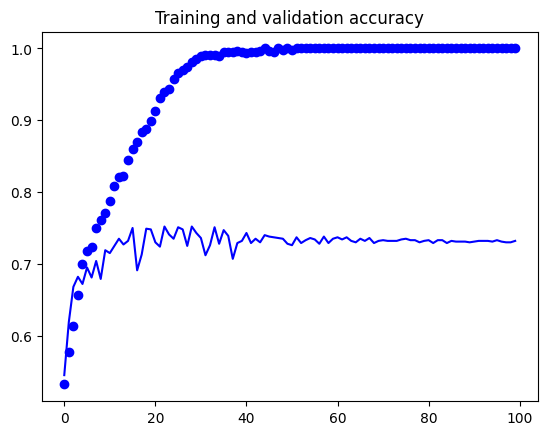

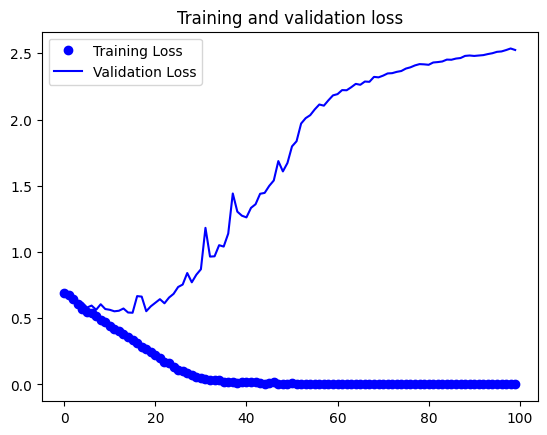

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Training accuracy is almost 100%, while that of validation is between 70 and 80%, which as a whole is a great example of overfitting. To avoid this, one straightforward technique is to to augment images a little bit.

In [ ]:
# Updated to do image augmentation
'''train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')'''

"train_datagen = ImageDataGenerator(\n      rotation_range=40,\n      width_shift_range=0.2,\n      height_shift_range=0.2,\n      shear_range=0.2,\n      zoom_range=0.2,\n      horizontal_flip=True,\n      fill_mode='nearest')"

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 16s - loss: 0.6926 - accuracy: 0.5280 - val_loss: 0.6859 - val_accuracy: 0.5000 - 16s/epoch - 165ms/step
Epoch 2/100
100/100 - 16s - loss: 0.6868 - accuracy: 0.5330 - val_loss: 0.6797 - val_accuracy: 0.5770 - 16s/epoch - 161ms/step
Epoch 3/100
100/100 - 15s - loss: 0.6733 - accuracy: 0.5780 - val_loss: 0.6694 - val_accuracy: 0.5680 - 15s/epoch - 154ms/step
Epoch 4/100
100/100 - 15s - loss: 0.6730 - accuracy: 0.5685 - val_loss: 0.6589 - val_accuracy: 0.6040 - 15s/epoch - 150ms/step
Epoch 5/100
100/100 - 15s - loss: 0.6635 - accuracy: 0.6010 - val_loss: 0.6665 - val_accuracy: 0.5610 - 15s/epoch - 147ms/step
Epoch 6/100
100/100 - 16s - loss: 0.6534 - accuracy: 0.6085 - val_loss: 0.6225 - val_accuracy: 0.6670 - 16s/epoch - 156ms/step
Epoch 7/100
100/100 - 16s - loss: 0.6397 - accuracy: 0.6285 - val_loss: 0.6283 - val_accuracy: 0.6310 - 16s/epoch - 162ms/step
Epoch 8/100
100/100 - 15s -

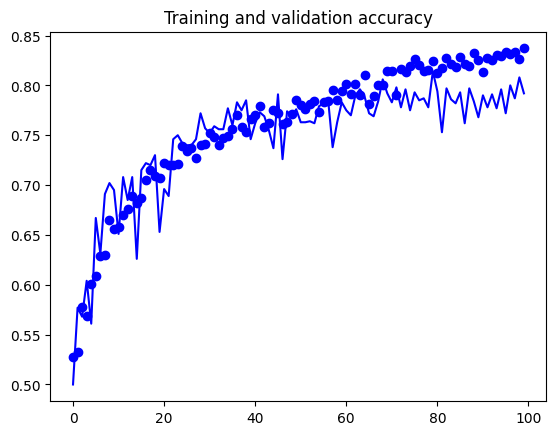

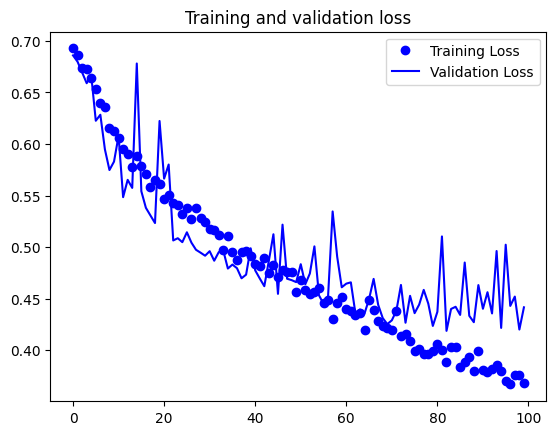

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()